In [1]:
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Hp\Desktop\ML project data sets\Regression dataset\Australian Vehicle Prices.csv")

In [5]:
# View the dataset
data.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [6]:
# Size of the dataset
data.shape

(16734, 19)

In [7]:
data['UsedOrNew'].value_counts()

USED    14994
NEW      1227
DEMO      512
Name: UsedOrNew, dtype: int64

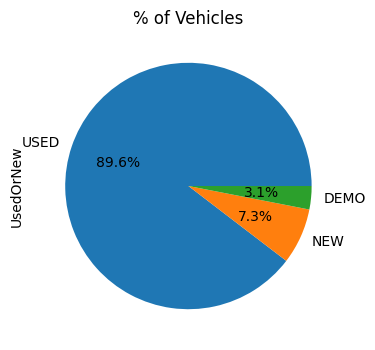

In [8]:
# Pie chart of vehicles
plt.figure(figsize= (5,4))
data['UsedOrNew'].value_counts().plot.pie(autopct= '%1.1f%%')
plt.title('% of Vehicles')
plt.show()

In [9]:
# As we are trying to predict used_car price, remove the unwanted records
df = data[data['UsedOrNew'] == 'USED'].reset_index(drop=True)

In [10]:
# You can find only 'used' in UsedOrNew column
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
1,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
2,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
3,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990
4,Toyota,2004.0,Estima,ON FOUR WHEELS,2004 Toyota Estima T EDITION,USED,Automatic,-,Other,Unleaded,-,160230,Grey / -,"Saint Marys, NSW",-,Commercial,NaN,NaN,9990


In [11]:
# Look at the columns
df.columns

Index(['Brand', 'Year', 'Model', 'Car/Suv', 'Title', 'UsedOrNew',
       'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption',
       'Kilometres', 'ColourExtInt', 'Location', 'CylindersinEngine',
       'BodyType', 'Doors', 'Seats', 'Price'],
      dtype='object')

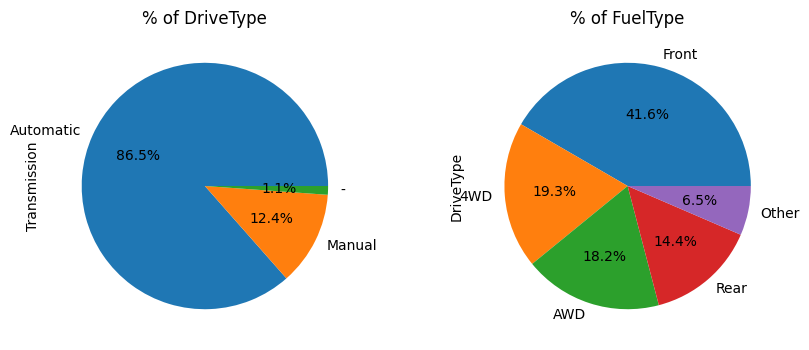

In [12]:
# Creating a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Pie chart for DriveType
df['Transmission'].value_counts().plot.pie(ax=axs[0], autopct='%1.1f%%')
axs[0].set_title('% of DriveType')

# Pie chart for FuelType
df['DriveType'].value_counts().plot.pie(ax=axs[1], autopct='%1.1f%%')
axs[1].set_title('% of FuelType')

plt.show()

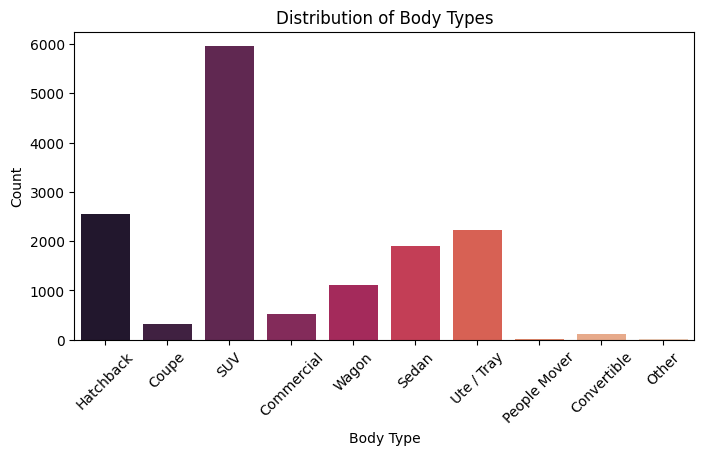

In [13]:
# Create a count plot for the 'BodyType' column
plt.figure(figsize=(8, 4))
sns.countplot(x='BodyType', data=df, palette='rocket')

plt.title('Distribution of Body Types')
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

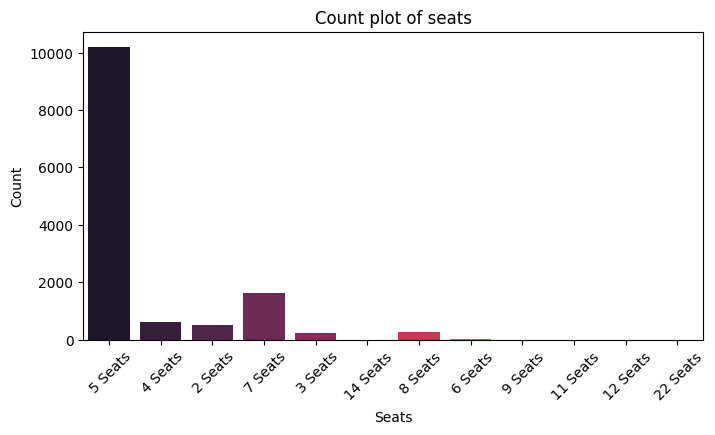

In [14]:
# Count plot for 'Seats'
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Seats',palette='rocket')

plt.title('Count plot of seats')
plt.xlabel('Seats')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

## Data Cleaning 

In [15]:
# As the all columns are not required for price prediction we are removing the Model,Car/Suv,Title,UsedOrNew,ColourExtInt,
# Location,CylindersinEngine,Doors

df = df.drop(['Model','Car/Suv','Title','UsedOrNew','ColourExtInt','Location','CylindersinEngine','Doors'],axis=1)

In [16]:
# Required columns
df.columns

Index(['Brand', 'Year', 'Transmission', 'Engine', 'DriveType', 'FuelType',
       'FuelConsumption', 'Kilometres', 'BodyType', 'Seats', 'Price'],
      dtype='object')

In [17]:
# Check the null values
df.isnull().sum()

Brand                 0
Year                  0
Transmission          0
Engine                0
DriveType             0
FuelType              0
FuelConsumption       0
Kilometres            0
BodyType            263
Seats              1476
Price                 2
dtype: int64

In [18]:
# Remove the 2 null records in the price column
df.dropna(subset=['Price'],inplace= True)

In [19]:
df.head()

,Brand,Year,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,BodyType,Seats,Price
0,MG,2022.0,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Hatchback,5 Seats,19990
1,BMW,2022.0,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Coupe,4 Seats,108988
2,Mercedes-Benz,2011.0,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,Coupe,4 Seats,32990
3,Renault,2022.0,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,SUV,5 Seats,34990
4,Toyota,2004.0,Automatic,-,Other,Unleaded,-,160230,Commercial,NaN,9990


In [20]:
df[df['FuelConsumption']=='-']

,Brand,Year,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,BodyType,Seats,Price
4,Toyota,2004.0,Automatic,-,Other,Unleaded,-,160230,Commercial,NaN,9990
9,Toyota,2009.0,Automatic,-,Other,Unleaded,-,148190,Commercial,NaN,42500
11,Honda,2015.0,Automatic,-,Other,Unleaded,-,181745,NaN,NaN,11999
12,Toyota,2017.0,Automatic,-,Other,-,-,136296,NaN,NaN,38999
16,Mitsubishi,2013.0,Manual,-,Other,-,-,120020,Wagon,NaN,13999
...,...,...,...,...,...,...,...,...,...,...,...
14971,Nissan,2008.0,Automatic,-,Other,Unleaded,-,97000,Wagon,NaN,18000
14975,Nissan,2010.0,Automatic,-,Other,-,-,132000,NaN,NaN,19000
14987,Toyota,2011.0,Automatic,-,Front,Unleaded,-,97000,Wagon,NaN,21989
14990,Toyota,2014.0,Automatic,-,Front,Unleaded,-,66000,Commercial,NaN,29500


In [21]:
df = df[df['FuelConsumption']!='-'].reset_index(drop=True)
df.shape

(13517, 11)

In [22]:
df.isnull().sum()

Brand              0
Year               0
Transmission       0
Engine             0
DriveType          0
FuelType           0
FuelConsumption    0
Kilometres         0
BodyType           0
Seats              0
Price              0
dtype: int64

In [23]:
df['Engine'].unique()

array(['4 cyl, 1.5 L', '4 cyl, 2 L', '8 cyl, 5.5 L', '4 cyl, 1.3 L',
       '4 cyl, 1.6 L', '4 cyl, 2.7 L', '4 cyl, 3 L', '4 cyl, 1.4 L',
       '3 cyl, 1 L', '4 cyl, 2.4 L', '4 cyl, 2.5 L', '3 cyl, 1.2 L',
       '6 cyl, 2.7 L', '4 cyl, 1.8 L', '6 cyl, 4 L', '6 cyl, 3.5 L',
       '4 cyl, 2.2 L', '6 cyl, 3 L', '6 cyl, 3.2 L', '8 cyl, 6 L',
       '5 cyl, 3.2 L', '4 cyl, 2.3 L', '8 cyl, 4.1 L', '6 cyl, 3.6 L',
       '4 cyl, 1.2 L', '8 cyl, 4.8 L', '6 cyl, 3.8 L', '5 cyl, 2.5 L',
       '6 cyl, 3.3 L', '6 cyl, 4.2 L', '3 cyl, 1.5 L', '4 cyl, 2.8 L',
       '8 cyl, 4.5 L', '12 cyl, 6.6 L', '6 cyl, 3.7 L', '4 cyl, 2.1 L',
       '8 cyl, 4.4 L', '8 cyl, 5 L', '8 cyl, 4.2 L', '3 cyl, 1.6 L',
       '4 cyl, 1.9 L', '6 cyl, 2.5 L', '0 L', '8 cyl, 4 L',
       '8 cyl, 5.7 L', '4 cyl, 3.2 L', '2 cyl, 0.9 L', '8 cyl, 6.2 L',
       '8 cyl, 4.7 L', '6 cyl, 2.4 L', '4 cyl, 1.7 L', '5 cyl, 2.4 L',
       '8 cyl, 4.6 L', '8 cyl, 6.4 L', '6 cyl, 2.8 L', '6 cyl, 2.9 L',
       '3 cyl, 1.3 L', '8 cyl,

In [24]:
df[df['Engine']=='0 L']

,Brand,Year,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,BodyType,Seats,Price
542,Hyundai,2019.0,Automatic,0 L,Front,Electric,0 L / 100 km,41067,Hatchback,5 Seats,39990
775,Tesla,2019.0,Automatic,0 L,AWD,Electric,0 L / 100 km,39136,Sedan,5 Seats,159888
780,Tesla,2017.0,Automatic,0 L,4WD,Electric,0 L / 100 km,126860,SUV,5 Seats,79800
1436,Porsche,2022.0,-,0 L,AWD,Electric,0 L / 100 km,9510,Sedan,4 Seats,339900
1565,Mini,2022.0,Automatic,0 L,Front,Electric,0 L / 100 km,6000,Hatchback,4 Seats,54280
...,...,...,...,...,...,...,...,...,...,...,...
12897,Tesla,2022.0,Automatic,0 L,Rear,Electric,0 L / 100 km,4760,Sedan,5 Seats,62990
13047,Hyundai,2019.0,Automatic,0 L,Front,Electric,0 L / 100 km,25714,Hatchback,5 Seats,41990
13069,Mini,2022.0,Automatic,0 L,Front,Electric,0 L / 100 km,5100,Hatchback,4 Seats,59990
13254,Nissan,2021.0,Automatic,0 L,Front,Electric,0 L / 100 km,29050,Hatchback,5 Seats,48990


In [25]:
df = df[df['Engine']!='0 L'].reset_index(drop=True)

In [26]:
# Splitting 'Engine' column into 'Cylinders' and 'Size'
df[['Cylinders', 'Engine_size(L)']] = df['Engine'].str.split(', ', expand=True)

# Extracting numerical values from 'Engine' column
df['Engine_size(L)'] = df['Engine_size(L)'].str.replace(' L', '')
df = df.drop(labels=['Engine','Cylinders'],axis=1)

In [27]:
df.head(3)

,Brand,Year,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,BodyType,Seats,Price,Engine_size(L)
0,MG,2022.0,Automatic,Front,Premium,6.7 L / 100 km,16,Hatchback,5 Seats,19990,1.5
1,BMW,2022.0,Automatic,Rear,Premium,6.6 L / 100 km,8472,Coupe,4 Seats,108988,2
2,Mercedes-Benz,2011.0,Automatic,Rear,Premium,11 L / 100 km,136517,Coupe,4 Seats,32990,5.5


In [28]:
#Change the FuelConsumption column name to FuelConsump_per_100km
df = df.rename(columns={'FuelConsumption': 'FuelConsump_per_100km'})
df['FuelConsump_per_100km'] = df['FuelConsump_per_100km'].str.extract(r'(\d+\.\d+|\d+)').astype(float).astype('float64')

In [29]:
df.head(3)

,Brand,Year,Transmission,DriveType,FuelType,FuelConsump_per_100km,Kilometres,BodyType,Seats,Price,Engine_size(L)
0,MG,2022.0,Automatic,Front,Premium,6.7,16,Hatchback,5 Seats,19990,1.5
1,BMW,2022.0,Automatic,Rear,Premium,6.6,8472,Coupe,4 Seats,108988,2
2,Mercedes-Benz,2011.0,Automatic,Rear,Premium,11.0,136517,Coupe,4 Seats,32990,5.5


In [30]:
# تحويل قيم العمود 'Seats' إلى أرقام صحيحة
df['Seats'] = df['Seats'].str.extract(r'(\d+)').astype(float).astype(int)

# تحويل قيم العمود 'Year' إلى أعداد صحيحة
df['Year'] = df['Year'].astype(int)

In [31]:
# View the Kilometres column which contain '-' values
df[df['Kilometres']=='-']

,Brand,Year,Transmission,DriveType,FuelType,FuelConsump_per_100km,Kilometres,BodyType,Seats,Price,Engine_size(L)
12626,Lexus,2007,Automatic,4WD,Unleaded,11.2,-,SUV,5,7999,3.5
12684,Toyota,2008,Automatic,Front,Unleaded,9.9,-,Sedan,5,8990,3.5
12920,Subaru,2013,Automatic,AWD,Unleaded,7.1,-,SUV,5,POA,2
13091,Toyota,1998,Automatic,4WD,Unleaded,15.0,-,SUV,8,8990,3.4
13187,Suzuki,2022,Automatic,AWD,Premium,6.2,-,SUV,5,43888,1.4
13338,Hyundai,2011,Automatic,Rear,Diesel,9.6,-,Commercial,3,15799,2.5
13342,Nissan,2015,Automatic,Front,Unleaded,7.9,-,SUV,5,21987,2.5


In [32]:
# Remove the records with '-' values
df= df[df['Kilometres']!='-']

# Change to int type
df['Kilometres'] = df['Kilometres'].astype(int)

In [33]:
# View the Price column which contains 'POA' values
df[df['Price']=='POA']

,Brand,Year,Transmission,DriveType,FuelType,FuelConsump_per_100km,Kilometres,BodyType,Seats,Price,Engine_size(L)
12666,Volvo,2021,Automatic,AWD,Hybrid,7.6,52197,SUV,5,POA,2
12849,Mazda,2017,Automatic,AWD,Unleaded,8.8,64110,SUV,7,POA,2.5
13186,Kia,2017,Automatic,Front,Unleaded,5.3,30132,Hatchback,5,POA,1.2
13390,MG,2022,Automatic,Front,Unleaded,7.3,14784,SUV,5,POA,1.5


In [34]:
df = df[df['Price']!='POA']
df['Price'] = df['Price'].astype(int)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13440 entries, 0 to 13450
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  13440 non-null  object 
 1   Year                   13440 non-null  int32  
 2   Transmission           13440 non-null  object 
 3   DriveType              13440 non-null  object 
 4   FuelType               13440 non-null  object 
 5   FuelConsump_per_100km  13440 non-null  float64
 6   Kilometres             13440 non-null  int32  
 7   BodyType               13440 non-null  object 
 8   Seats                  13440 non-null  int32  
 9   Price                  13440 non-null  int32  
 10  Engine_size(L)         13440 non-null  object 
dtypes: float64(1), int32(4), object(6)
memory usage: 1.0+ MB


In [36]:
df.head()

,Brand,Year,Transmission,DriveType,FuelType,FuelConsump_per_100km,Kilometres,BodyType,Seats,Price,Engine_size(L)
0,MG,2022,Automatic,Front,Premium,6.7,16,Hatchback,5,19990,1.5
1,BMW,2022,Automatic,Rear,Premium,6.6,8472,Coupe,4,108988,2
2,Mercedes-Benz,2011,Automatic,Rear,Premium,11.0,136517,Coupe,4,32990,5.5
3,Renault,2022,Automatic,Front,Unleaded,6.0,1035,SUV,5,34990,1.3
4,Land,2017,Automatic,AWD,Diesel,5.1,67662,SUV,4,62280,2


In [37]:
df.shape

(13440, 11)

In [38]:
df.isnull().sum()

Brand                    0
Year                     0
Transmission             0
DriveType                0
FuelType                 0
FuelConsump_per_100km    0
Kilometres               0
BodyType                 0
Seats                    0
Price                    0
Engine_size(L)           0
dtype: int64

#### Now we have the cleand dataset

In [39]:
# create a copy
df1 = df.copy()

In [40]:
# Group by brand column
brand_stats = df1.groupby('Brand')['Brand'].agg('count').sort_values(ascending=False)
brand_stats

Brand
Toyota         2258
Hyundai        1091
Holden         1024
Ford            967
Mazda           934
               ... 
Rolls-Royce       1
Iveco             1
Proton            1
Tata              1
Daewoo            1
Name: Brand, Length: 62, dtype: int64

In [41]:
len(brand_stats[brand_stats<=10])

23

In [42]:
len(df1.Brand.unique())

62

In [43]:
brand_stats_lessthan_10 = brand_stats[brand_stats<=10]
brand_stats_lessthan_10

Brand
Dodge          10
Chevrolet       9
Cupra           7
Ferrari         6
Bentley         5
Mahindra        4
McLaren         4
FPV             4
Opel            4
Genesis         4
Infiniti        3
Aston           2
Chery           2
Foton           2
Lamborghini     2
Abarth          2
Saab            1
Smart           1
Rolls-Royce     1
Iveco           1
Proton          1
Tata            1
Daewoo          1
Name: Brand, dtype: int64

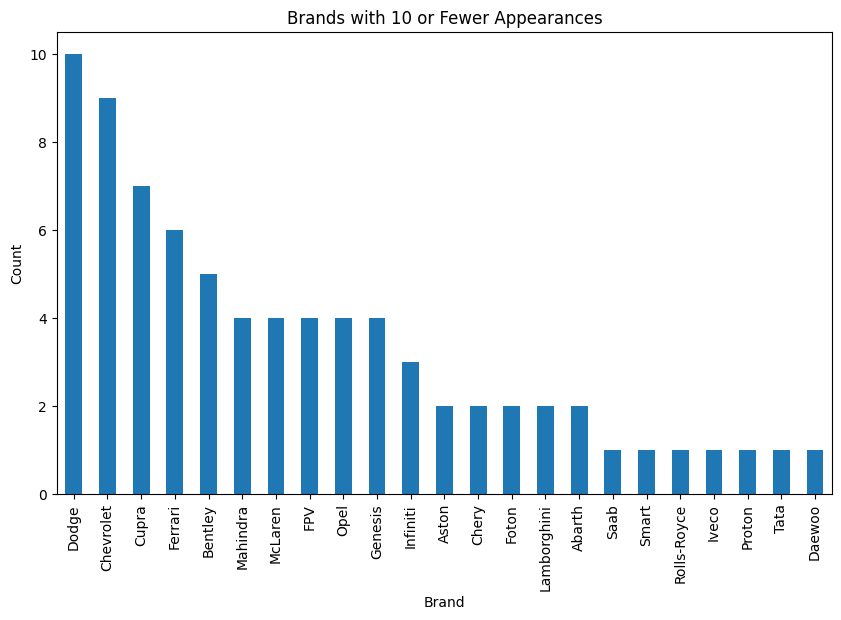

In [44]:
plt.figure(figsize=(10, 6))
brand_stats_lessthan_10.plot(kind='bar')
plt.title('Brands with 10 or Fewer Appearances')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

In [45]:
# Grouping the records into 'other' brand whose count is less than 10
df1.Brand = df1.Brand.apply(lambda x: 'other' if x in brand_stats_lessthan_10 else x)

In [46]:
brand_stats = df1.groupby('Brand')['Brand'].agg('count').sort_values(ascending=False)
brand_stats

Brand
Toyota           2258
Hyundai          1091
Holden           1024
Ford              967
Mazda             934
Mitsubishi        915
Nissan            806
Kia               756
Volkswagen        640
Mercedes-Benz     526
Subaru            516
BMW               381
Audi              374
Honda             320
Jeep              240
Suzuki            209
Land              194
Isuzu             168
Lexus             151
MG                127
Renault           111
Volvo              87
other              77
Skoda              74
LDV                73
Porsche            69
Mini               53
Peugeot            45
HSV                43
Jaguar             41
Fiat               27
GWM                24
Chrysler           23
Ram                18
Great              16
Ssangyong          15
Alfa               13
Haval              12
Citroen            11
Maserati           11
Name: Brand, dtype: int64

In [47]:
# Calculate z-scores for the 'Price' column within each brand
df1['z_score'] = df1.groupby('Brand')['Price'].transform(lambda x: zscore(x))

# Identify and remove rows with z-scores outside the range [-1, 1]
df2 = df1[(df1['z_score'] >= -1) & (df1['z_score'] <= 1)]

# Drop the 'z_score' column
df2 = df2.drop('z_score', axis=1)

# Display the shape of the resulting DataFrame
print(df2.shape)

(9938, 11)


In [48]:
df2.head()

,Brand,Year,Transmission,DriveType,FuelType,FuelConsump_per_100km,Kilometres,BodyType,Seats,Price,Engine_size(L)
0,MG,2022,Automatic,Front,Premium,6.7,16,Hatchback,5,19990,1.5
2,Mercedes-Benz,2011,Automatic,Rear,Premium,11.0,136517,Coupe,4,32990,5.5
4,Land,2017,Automatic,AWD,Diesel,5.1,67662,SUV,4,62280,2
6,Toyota,2013,Automatic,Rear,Premium,7.1,82012,Coupe,4,24888,2
7,Honda,2014,Automatic,Front,Hybrid,4.5,38229,Hatchback,5,17900,1.3


In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9938 entries, 0 to 13450
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  9938 non-null   object 
 1   Year                   9938 non-null   int32  
 2   Transmission           9938 non-null   object 
 3   DriveType              9938 non-null   object 
 4   FuelType               9938 non-null   object 
 5   FuelConsump_per_100km  9938 non-null   float64
 6   Kilometres             9938 non-null   int32  
 7   BodyType               9938 non-null   object 
 8   Seats                  9938 non-null   int32  
 9   Price                  9938 non-null   int32  
 10  Engine_size(L)         9938 non-null   object 
dtypes: float64(1), int32(4), object(6)
memory usage: 776.4+ KB


In [50]:
# Create an empty list to store categorical columns
cat_columns = []

# Iterate through all column names in the dataframe (df2)
for col in df2.columns:
    # Check if the data type of the column is 'object' (i.e., categorical)
    if df2[col].dtype == 'object':
        # If the condition is met, add the column name to the list of categorical columns
        cat_columns.append(col)

# Print the final list of categorical columns
print(cat_columns)

['Brand', 'Transmission', 'DriveType', 'FuelType', 'BodyType', 'Engine_size(L)']


In [51]:
# Create a list to store numerical columns (excluding 'Price')
num_columns = []

# Iterate through all column names in the dataframe (df2)
for col in df2.columns:
    # Check if the data type of the column is not 'object' (i.e., numerical) and the column name is not 'Price'
    if df2[col].dtype != 'object' and col != 'Price':
        # If the conditions are met, add the column name to the list of numerical columns
        num_columns.append(col)

# Print the final list of numerical columns
print(num_columns)

['Year', 'FuelConsump_per_100km', 'Kilometres', 'Seats']


In [52]:
df2.duplicated().sum()

2

In [53]:
df2.drop_duplicates(inplace=True)

In [54]:
# Create a categorical columns list
cat_col = []
for i in df2.columns:
    if df2[i].dtype == 'object':
        cat_col.append(i)

# Applying one-hot encoding to categorical columns while removing the 'Brand_' prefix
df_enc = pd.get_dummies(df2, columns=cat_col, prefix='', prefix_sep='')

# Displaying the encoded DataFrame
df_enc.head()

,Year,FuelConsump_per_100km,Kilometres,Seats,Price,Alfa,Audi,BMW,Chrysler,Citroen,...,5.3,5.4,5.5,5.7,5.9,6,6.1,6.2,6.4,6.8
0,2022,6.7,16,5,19990,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,11.0,136517,4,32990,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2017,5.1,67662,4,62280,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2013,7.1,82012,4,24888,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2014,4.5,38229,5,17900,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df_enc.shape

(9936, 120)

In [56]:
# Drop the price column in X
X = df_enc.drop(columns=['Price'])
y = df_enc['Price']

In [57]:
# create train/test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3,random_state=42)

In [58]:
# Scale the data
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
X_trainScaled = st.fit_transform(X_train)
X_testScaled = st.transform(X_test)

In [59]:
# Add a constant to the scaled training data
X_train_scaled_const = sm.add_constant(X_trainScaled)

# Create and train the OLS model

# 'sm' is commonly used as an abbreviation for 'statsmodels'
# It is a Python library used for statistical analysis and model building
sm_model_lr = sm.OLS(y_train, X_train_scaled_const).fit()

In [60]:
from pycaret.regression import *
from sklearn.preprocessing import LabelEncoder
# Assuming 'df' is your DataFrame
le = LabelEncoder()
df['Price'] = le.fit_transform(df['Price'])

# Now, you can use PyCaret setup
exp_reg = setup(data=df, target='Price', session_id=42)

,Description,Value
0,Session id,42
1,Target,Price
2,Target type,Regression
3,Original data shape,"(13440, 11)"
4,Transformed data shape,"(13440, 32)"
5,Transformed train set shape,"(9408, 32)"
6,Transformed test set shape,"(4032, 32)"
7,Numeric features,4
8,Categorical features,6
9,Preprocess,True


In [61]:
# Compare and evaluate multiple regression models
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,143.4069,40291.1914,200.5431,0.9188,0.3361,0.2863,0.2940
et,Extra Trees Regressor,142.3035,41657.3486,203.9028,0.9161,0.3376,0.2939,1.2600
rf,Random Forest Regressor,147.9538,45050.5545,212.0407,0.9092,0.3476,0.3133,1.8050
gbr,Gradient Boosting Regressor,185.3143,62642.4509,250.1577,0.8738,0.4076,0.3619,0.5650
dt,Decision Tree Regressor,191.7531,81316.0621,284.8719,0.8359,0.4471,0.3399,0.1350
lr,Linear Regression,249.2747,105986.2539,325.3421,0.7866,0.5889,0.7514,1.0070
ridge,Ridge Regression,249.3647,105977.6424,325.3321,0.7866,0.5860,0.7500,0.1190
br,Bayesian Ridge,249.4020,105983.5617,325.3441,0.7866,0.5864,0.7492,0.1260
llar,Lasso Least Angle Regression,249.9678,106536.5740,326.1987,0.7855,0.5845,0.7500,0.1330
lasso,Lasso Regression,249.9678,106536.5740,326.1987,0.7855,0.5845,0.7500,0.1250


In [62]:
# Print the statistical summary
print(sm_model_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     226.2
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        02:29:43   Log-Likelihood:                -71726.
No. Observations:                6955   AIC:                         1.437e+05
Df Residuals:                    6845   BIC:                         1.444e+05
Df Model:                         109                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.033e+04     88.087    344.279      0.0

### Create a Gradient Boosting model

In [63]:
gb_model = GradientBoostingRegressor(random_state=42)

In [64]:

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [65]:
# Create the GridSearchCV object
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid, scoring='r2', cv=5)

In [66]:
# Fit the GridSearchCV object to the training data
grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='r2')

In [67]:
# Get the best hyperparameters
best_params_gb = grid_search_gb.best_params_

# Train the model with the best hyperparameters
best_gb_model = GradientBoostingRegressor(random_state=42, **best_params_gb)
best_gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = best_gb_model.predict(X_test)

# Evaluate the tuned model
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)

# Print the results
print('Best Hyperparameters (Gradient Boosting):', best_params_gb)
print('Tuned R² Score (Gradient Boosting):', r2_gb)
print('Tuned Mean Absolute Error (Gradient Boosting):', mae_gb)
print('Tuned Mean Squared Error (Gradient Boosting):', mse_gb)

Best Hyperparameters (Gradient Boosting): {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Tuned R² Score (Gradient Boosting): 0.834570024181692
Tuned Mean Absolute Error (Gradient Boosting): 3407.9933994391713
Tuned Mean Squared Error (Gradient Boosting): 38481264.31581313


In [68]:
best_gb_model.score(X_train, y_train)

0.9509970750805877

### Create and train the Random Forest model

In [69]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [70]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

In [71]:
# Evaluate the model
r2_rf = r2_score(y_test, y_pred_rf)
MAE_rf = mean_absolute_error(y_test, y_pred_rf)
MSE_rf = mean_squared_error(y_test, y_pred_rf)

In [72]:
# Print the results
print('Random Forest R² Score:', r2_rf)
print('Random Forest Mean Absolute Error:', MAE_rf)
print('Random Forest Mean Squared Error:', MSE_rf)

Random Forest R² Score: 0.824171103261864
Random Forest Mean Absolute Error: 3539.2513748182932
Random Forest Mean Squared Error: 40900194.87864315


In [73]:
rf_model.score(X_train, y_train)

0.9780183696323285

In [74]:
rf_model.score(X_test,y_test)

0.824171103261864

### Apply hyperparameter tuning using techniques like Grid Search.

In [75]:
# Define the hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [76]:
# Create the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

In [77]:
# Create the GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='r2', cv=5)

In [78]:
# Fit the GridSearchCV object to the training data
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='r2')

In [79]:
# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_

# Train and evaluate the model with the best hyperparameters
best_rf_model = RandomForestRegressor(random_state=42, **best_params_rf)
best_rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf_tuned = best_rf_model.predict(X_test)

In [80]:
# Evaluate the tuned model
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)
MAE_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
MSE_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)

# Print the results
print('Best Hyperparameters (Random Forest):', best_params_rf)
print('Tuned Random Forest R² Score:', r2_rf_tuned)
print('Tuned Random Forest Mean Absolute Error:', MAE_rf_tuned)
print('Tuned Random Forest Mean Squared Error:', MSE_rf_tuned)

Best Hyperparameters (Random Forest): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Tuned Random Forest R² Score: 0.8252285808443769
Tuned Random Forest Mean Absolute Error: 3521.5719249586
Tuned Random Forest Mean Squared Error: 40654211.19787772


In [81]:
best_rf_model.score(X_train, y_train)

0.9785964504561546

In [82]:
!pip install pycaret

In [83]:
from pycaret.regression import *